### Basic math behind Time series and ARIMA model
An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

Any time series data has three properties:
Trend: upwards or downwards
Seasonality:
Noise: random spikes and troughs

<img src="stationery.png">

If a time series is stationary and has a particular behaviour over a given time interval, then it is safe to assume that it will have same behaviour at some later point in time. Most statistical modelling methods assume or require the time series to be stationary.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

- AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.
- I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
- MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The parameters of the ARIMA(p,d,q) model are defined as follows:

- p: The number of lag observations included in the model, also called the lag order.
- d: The number of times that the raw observations are differenced, also called the degree of differencing.
- q: The size of the moving average window, also called the order of moving average.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # to separate pages based on language (regular expression)
import matplotlib.pyplot as plt # to visualize data
from statsmodels.tsa.arima_model import ARIMA # to make an ARIMA model that fits the data

In [2]:
train_df = pd.read_csv('train_1.csv').fillna(0)
train_df.head()

#We can use the below code if we are making the date as the index for time series analysis

#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
#data = pd.read_csv('.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB


In [4]:
#Simple Regex code to get language of any given page
def find_language(url):
    res = re.search('[a-z][a-z].wikipedia.org',url)
    if res:
        return res[0][0:2]
    return 'na'

train_df['lang'] = train_df.Page.map(find_language)

In [5]:
#Here we separate all the pages based on their language and average them up to find views per page per language
lang_sets = {}
lang_sets['en'] = train_df[train_df.lang=='en'].iloc[:,0:-1] #iloc [l1:l2] l1- rows and l2- columns
lang_sets['ja'] = train_df[train_df.lang=='ja'].iloc[:,0:-1]
lang_sets['de'] = train_df[train_df.lang=='de'].iloc[:,0:-1]
lang_sets['na'] = train_df[train_df.lang=='na'].iloc[:,0:-1]
lang_sets['fr'] = train_df[train_df.lang=='fr'].iloc[:,0:-1]
lang_sets['zh'] = train_df[train_df.lang=='zh'].iloc[:,0:-1]
lang_sets['ru'] = train_df[train_df.lang=='ru'].iloc[:,0:-1]
lang_sets['es'] = train_df[train_df.lang=='es'].iloc[:,0:-1]

sums = {}
for key in lang_sets.keys(): # can also use lang_sets in for loop to get keys
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]  #sum(axis=?): 0 then across columns, 1 then across rows

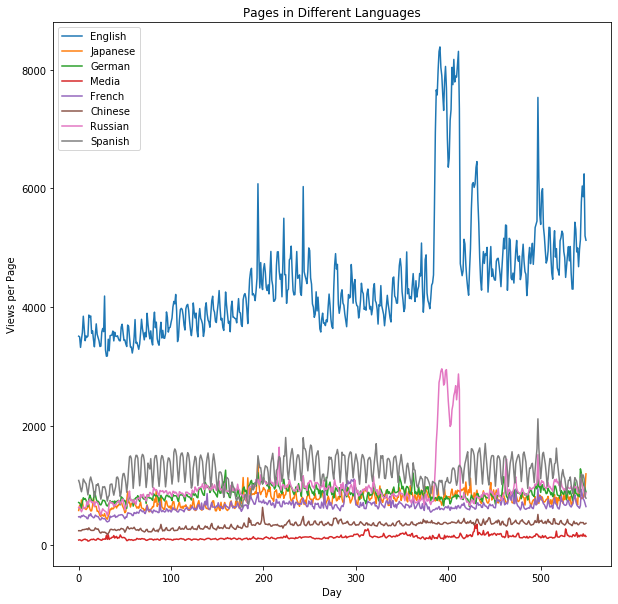

In [6]:
#Plots of avg # of views for all different languages per day
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[10,10])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German',
        'na':'Media','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'
       }

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )
    
plt.legend()
plt.show()

#### How to check stationarity?
- Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
- Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary

en


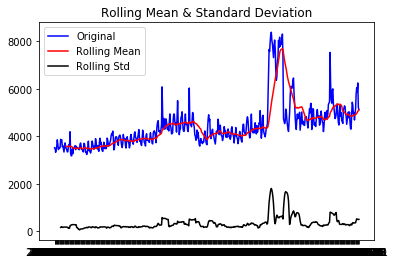

Results of Dickey-Fuller Test:
Test Statistic                  -2.247284
p-value                          0.189534
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64
ja


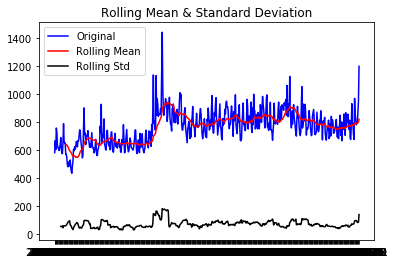

Results of Dickey-Fuller Test:
Test Statistic                  -2.555394
p-value                          0.102571
#Lags Used                       8.000000
Number of Observations Used    541.000000
Critical Value (1%)             -3.442495
Critical Value (5%)             -2.866897
Critical Value (10%)            -2.569623
dtype: float64
de


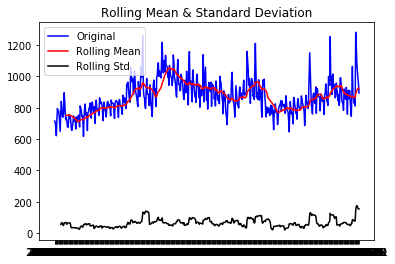

Results of Dickey-Fuller Test:
Test Statistic                  -2.402707
p-value                          0.140974
#Lags Used                      16.000000
Number of Observations Used    533.000000
Critical Value (1%)             -3.442678
Critical Value (5%)             -2.866978
Critical Value (10%)            -2.569666
dtype: float64
na


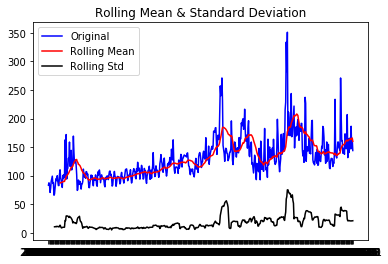

Results of Dickey-Fuller Test:
Test Statistic                  -3.269594
p-value                          0.016294
#Lags Used                       7.000000
Number of Observations Used    542.000000
Critical Value (1%)             -3.442473
Critical Value (5%)             -2.866887
Critical Value (10%)            -2.569618
dtype: float64
fr


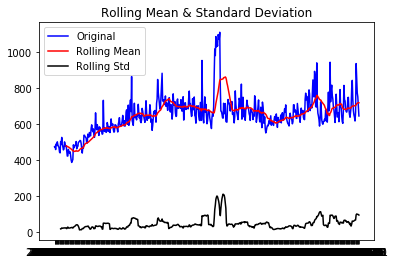

Results of Dickey-Fuller Test:
Test Statistic                  -2.849875
p-value                          0.051495
#Lags Used                      13.000000
Number of Observations Used    536.000000
Critical Value (1%)             -3.442609
Critical Value (5%)             -2.866947
Critical Value (10%)            -2.569650
dtype: float64
zh


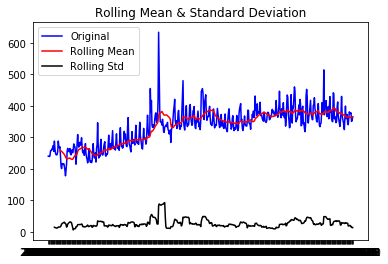

Results of Dickey-Fuller Test:
Test Statistic                  -1.668433
p-value                          0.447446
#Lags Used                      19.000000
Number of Observations Used    530.000000
Critical Value (1%)             -3.442749
Critical Value (5%)             -2.867009
Critical Value (10%)            -2.569683
dtype: float64
ru


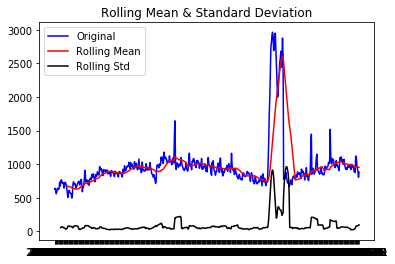

Results of Dickey-Fuller Test:
Test Statistic                  -3.924031
p-value                          0.001865
#Lags Used                       3.000000
Number of Observations Used    546.000000
Critical Value (1%)             -3.442384
Critical Value (5%)             -2.866848
Critical Value (10%)            -2.569597
dtype: float64
es


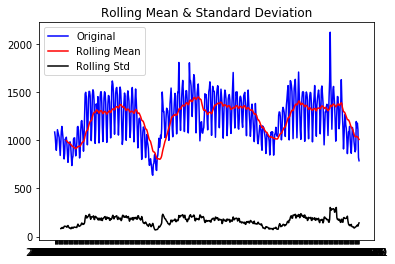

Results of Dickey-Fuller Test:
Test Statistic                  -3.014209
p-value                          0.033589
#Lags Used                      15.000000
Number of Observations Used    534.000000
Critical Value (1%)             -3.442655
Critical Value (5%)             -2.866968
Critical Value (10%)            -2.569661
dtype: float64


In [7]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(22).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries.values.reshape(-1)) # had to reshape coz it is a dataframe. Doesn't need it for series.
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

for key in sums:
    print(key)
    test_stationarity(pd.DataFrame(sums[key]))

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

#### How to make the timeseries stationary?
Though stationarity assumption is taken in many TS models, almost none of practical time series are stationary. So statisticians have figured out ways to make series stationary, which I will discuss now. Actually, its almost impossible to make a series perfectly stationary, but we try to take it as close as possible.

Estimating and eliminating trend

1)  Log transformation - One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. Lets take a log transform here for simplicity.

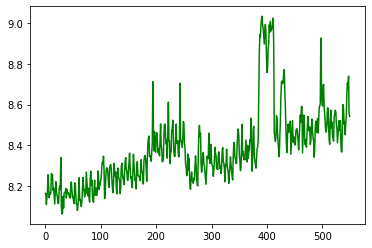

In [8]:
ts_log = np.log( sums['en'] )
plt.plot(ts_log.values, color='green')
plt.show()

In this simpler case, it is easy to see a forward trend in the data. But its not very intuitive in presence of noise.
- Aggregation – taking average for a time period like monthly/weekly averages
- Smoothing – taking rolling averages
- Polynomial Fitting – fit a regression model

We have already done smoothing. You can see it with this perspective in the above figures.

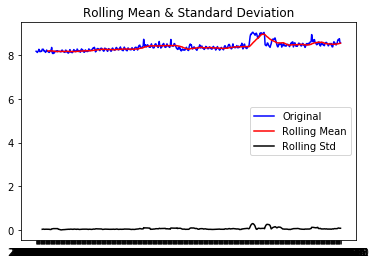

Results of Dickey-Fuller Test:
Test Statistic                  -2.032439
p-value                          0.272533
#Lags Used                      14.000000
Number of Observations Used    535.000000
Critical Value (1%)             -3.442632
Critical Value (5%)             -2.866957
Critical Value (10%)            -2.569655
dtype: float64


In [9]:
test_stationarity(ts_log)

Remove trend and seasonality with decomposition

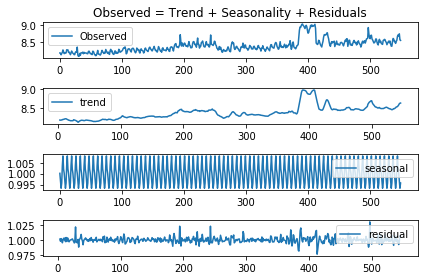

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose( ts_log.values, model="multiplicative", freq=7 )
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.title('Observed = Trend + Seasonality + Residuals')
plt.plot( ts_log.values, label='Observed' )
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

Remove trend and seasonality with differencing

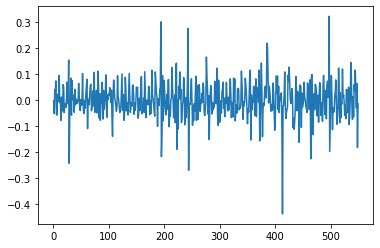

In [11]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot( ts_log_diff.values )
plt.show()

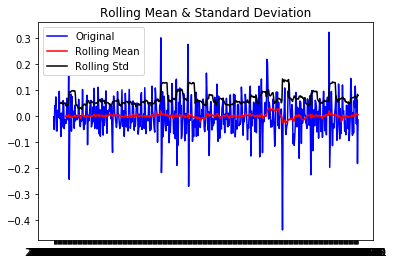

Results of Dickey-Fuller Test:
Test Statistic                -8.154260e+00
p-value                        9.513209e-13
#Lags Used                     1.300000e+01
Number of Observations Used    5.350000e+02
Critical Value (1%)           -3.442632e+00
Critical Value (5%)           -2.866957e+00
Critical Value (10%)          -2.569655e+00
dtype: float64


In [12]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

c:\users\heman\.conda\envs\tensor\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


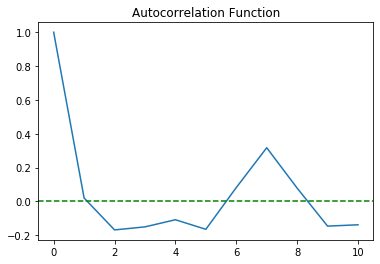

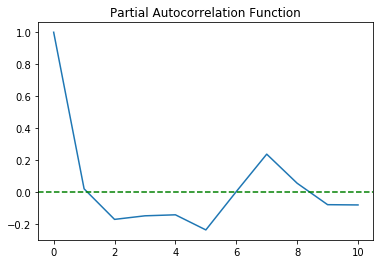

In [13]:
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
lag_acf = acf( ts_log_diff, nlags=10 )
lag_pacf = pacf( ts_log_diff, nlags=10, method='ols' )

plt.subplot(1,1,1)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='g')
plt.title('Autocorrelation Function')
plt.show()
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='g')
plt.title('Partial Autocorrelation Function')
plt.show()

#### p=1, d=1 and q=1
- P can be obtained from Autocorr plot and 1 lag is the moment it crosses the 0. 
- Q can be obtained from partial autocorr plot and 1 lag is the moment it crosses the 0. 
We can have boundaries as well to determine it more accuratlity but in our case we don't need it.

#### Auto Regressive (AR) model

Text(0.5, 1.0, 'RSS: 2.6605724')

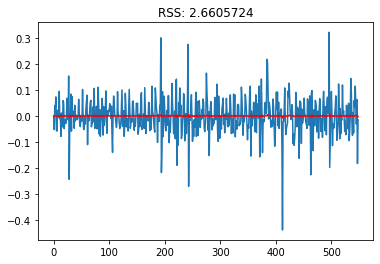

In [14]:
model = ARIMA(ts_log.values, order=(1,1,0))
results_ARIMA = model.fit(disp=-1)
plt.plot( ts_log_diff.values )
plt.plot( results_ARIMA.fittedvalues, color='red' )
plt.title( F"RSS: { sum( (results_ARIMA.fittedvalues - ts_log_diff.values)**2 ) :.7f}" )

#### Moving Average (MA) model

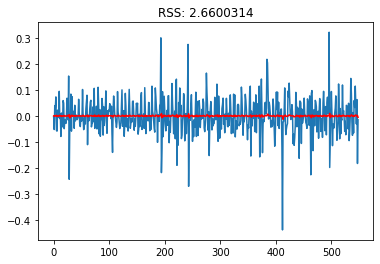

In [15]:
model = ARIMA(ts_log.values, order=(0,1,1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff.values)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff.values)**2))
plt.show()

#### ARIMA model

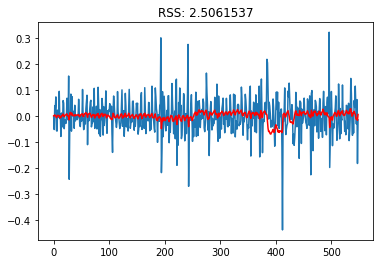

In [16]:
model = ARIMA( ts_log.values, order=(1,1,1) )
results_ARIMA = model.fit(disp=-1)
plt.plot(ts_log_diff.values)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title(F"RSS: { sum( (results_ARIMA.fittedvalues - ts_log_diff)**2 ) :.7f}")
plt.show()

In [17]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  549
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 699.951
Method:                       css-mle   S.D. of innovations              0.067
Date:                Tue, 12 Nov 2019   AIC                          -1391.902
Time:                        15:44:20   BIC                          -1374.670
Sample:                             1   HQIC                         -1385.167
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      5.830      0.000       0.001       0.001
ar.L1.D.y      0.8753      0.021     41.812      0.000       0.834       0.916
ma.L1.D.y     -1.0000      0.005   -182.566      0.000      -1.011      -0.989
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1425           +0.0000j            1.1425            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [18]:
size = int( len(ts_log) - 100 )
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

In [22]:
print("Printing Predicted vs Expected Values\n\n")
for t in range( len(test_arima) ):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    pred_value = output[0]
    original_value = test_arima[t]
    history.append(original_value)
    pred_value = np.exp(pred_value)
    original_value = np.exp(original_value)
    
    error = abs(pred_value - original_value)
    error_list.append(error)
    print('predicted = %f,   expected = %f,   mae = %f ' % (pred_value, original_value, error))
    predictions.append(float(pred_value))
    originals.append(float(original_value))

print('\n Means Absolute Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))))

Printing Predicted vs Expected Values


predicted = 5169.021843,   expected = 4461.695661,   mae = 707.326182 
predicted = 4572.137452,   expected = 4456.174589,   mae = 115.962862 
predicted = 4565.386806,   expected = 4775.697611,   mae = 210.310805 
predicted = 4853.079955,   expected = 4818.150572,   mae = 34.929383 
predicted = 4891.466583,   expected = 4824.929940,   mae = 66.536643 
predicted = 4897.468682,   expected = 4704.449021,   mae = 193.019661 
predicted = 4789.195327,   expected = 4559.138958,   mae = 230.056369 
predicted = 4657.657123,   expected = 4347.536502,   mae = 310.120621 
predicted = 4464.776786,   expected = 4645.420275,   mae = 180.643489 
predicted = 4695.423813,   expected = 4904.789282,   mae = 209.365468 
predicted = 4966.986349,   expected = 5161.465903,   mae = 194.479554 
predicted = 5196.161322,   expected = 4982.463373,   mae = 213.697949 
predicted = 5037.488281,   expected = 5385.581882,   mae = 348.093600 
predicted = 5395.129734,   expected = 5

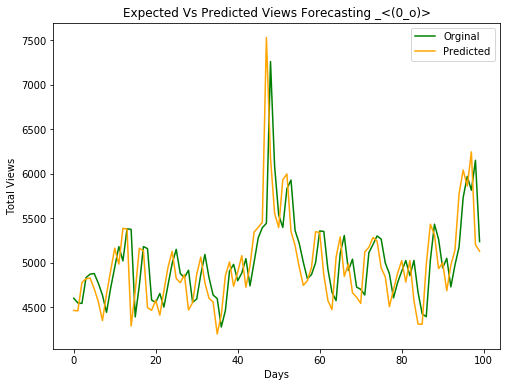

In [20]:
plt.figure(figsize=(8, 6))
test_day = [t for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'green')
plt.plot(test_day, originals, color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting _<(0_o)>')
plt.xlabel('Days')
plt.ylabel('Total Views')
plt.legend(labels)
plt.show()

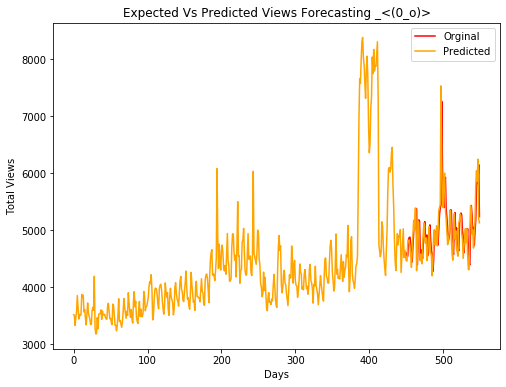

In [21]:
plt.figure(figsize=(8, 6))
test_day = [t+450 for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plt.plot(test_day, predictions, color= 'red')
plt.plot(days, sums['en'], color = 'orange')
plt.title('Expected Vs Predicted Views Forecasting _<(0_o)>')
plt.xlabel('Days')
plt.ylabel('Total Views')
plt.legend(labels)
plt.show()

ARIMA model pretty much does a good job in predicting the ENGLISH wiki pages web traffic. How ever it will be interesting to see how good an LSTM Neural network will perform in the time series prediction problems. I will save it for an other project.